In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# In[2]:


# Importing the dataset
dataset = pd.read_csv('DriverData.csv')
X = dataset.iloc[:, [2, 3]].values

In [3]:
# In[27]:


dataset

,User ID,Gender,Score1,Score2,Category
0,15624510,Male,84,83,1
1,15810944,Male,76,77,1
2,15668575,Female,83,84,1
3,15603246,Female,77,76,1
4,15804002,Male,82,81,1
5,15728773,Male,78,79,1
6,15598044,Female,81,82,1
7,15694829,Female,79,78,1
8,15600575,Male,85,84,1
9,15727311,Female,75,74,1


In [4]:
# In[28]:


dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User ID   30 non-null     int64 
 1   Gender    30 non-null     object
 2   Score1    30 non-null     int64 
 3   Score2    30 non-null     int64 
 4   Category  30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
# In[3]:


dataset.shape

(30, 5)

In [6]:
dataset.describe()

,User ID,Score1,Score2,Category
count,3.000000e+01,30.000000,30.000000,30.000000
mean,1.567453e+07,60.000000,59.800000,2.000000
std,7.611539e+04,16.948197,16.953079,0.830455
min,1.557077e+07,35.000000,34.000000,1.000000
25%,1.560400e+07,43.250000,43.250000,1.000000
50%,1.566858e+07,60.000000,60.000000,2.000000
75%,1.572841e+07,76.750000,76.750000,3.000000
max,1.581094e+07,85.000000,84.000000,3.000000


In [7]:
# In[6]:


print (X)

[[84 83]
 [76 77]
 [83 84]
 [77 76]
 [82 81]
 [78 79]
 [81 82]
 [79 78]
 [85 84]
 [75 74]
 [61 62]
 [59 58]
 [62 61]
 [58 59]
 [63 64]
 [57 56]
 [64 63]
 [56 57]
 [65 64]
 [55 54]
 [43 44]
 [37 36]
 [44 43]
 [36 37]
 [45 44]
 [35 34]
 [41 42]
 [39 38]
 [42 41]
 [38 39]]


In [8]:
# In[7]:


dataset.isnull().sum()

User ID     0
Gender      0
Score1      0
Score2      0
Category    0
dtype: int64

In [9]:
# In[8]:


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
# In[10]:


# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

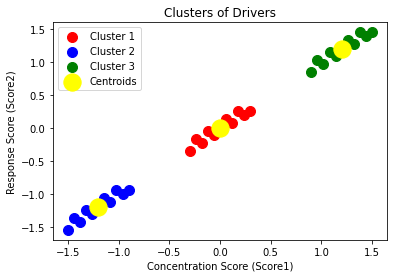

In [11]:
# In[11]:


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Drivers')
plt.xlabel('Concentration Score (Score1)')
plt.ylabel('Response Score (Score2)')
plt.legend()
plt.show()